In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_excel("/content/health_data_clean.xlsx")

In [6]:
df.head(5)

,Year,Month,District,Live_Births,ANC_Registrations,Early_ANC_Registrations,ANC_4_Checkups,Institutional_Deliveries,Home_Deliveries,Urban_Institutional_Deliveries,...,Institutional_Delivery_Rate,Immunization_Coverage,MMR,IMR,Urban_Delivery_Rate,Rural_Delivery_Rate,Rural_Urban_Gap,MMR_Score,IMR_Score,Composite_Health_Index
0,2024,Sep,Puri,359.0,712.0,507.0,156.0,257.0,102.0,131,...,71.587744,104.735376,139.275766,11.142061,74.431818,68.852459,5.579359,85.190344,74.558090,67.772364
1,2023,Mar,Koraput,452.0,458.0,339.0,214.0,366.0,106.0,208,...,77.542373,152.433628,331.858407,15.486726,87.029289,74.178404,12.850885,64.712389,63.092308,79.685335
2,2023,Nov,Sambalpur,496.0,550.0,328.0,343.0,453.0,43.0,200,...,91.330645,75.806452,403.225806,12.096774,94.786730,88.771930,6.014800,57.123656,72.038556,71.272613
3,2023,Nov,Puri,770.0,874.0,604.0,533.0,578.0,192.0,390,...,75.064935,94.415584,0.000000,14.285714,82.802548,62.876254,19.926294,100.000000,66.261836,74.871893
4,2024,Feb,Balasore,708.0,833.0,379.0,357.0,564.0,128.0,394,...,81.502890,95.338983,141.242938,12.711864,84.368308,70.539419,13.828889,84.981168,70.415303,66.277284


In [7]:
# Drop unnecessary columns (like Year, Month, District as they are categorical/non-numeric)
X = df.drop(columns=["Composite_Health_Index", "Year", "Month", "District"])
y = df["Composite_Health_Index"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Composite Index")
    plt.ylabel("Predicted Composite Index")
    plt.title(f"{name} - Actual vs Predicted")
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"{name} - Residual Distribution")
    plt.xlabel("Residuals")
    plt.show()

    return model, rmse, r2


Linear Regression Performance:
RMSE: 0.0000
R² Score: 1.0000


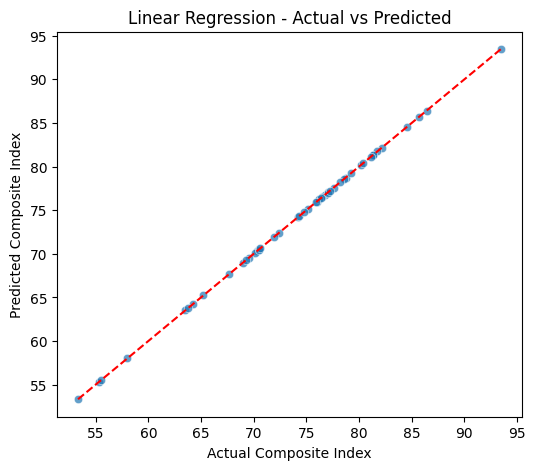

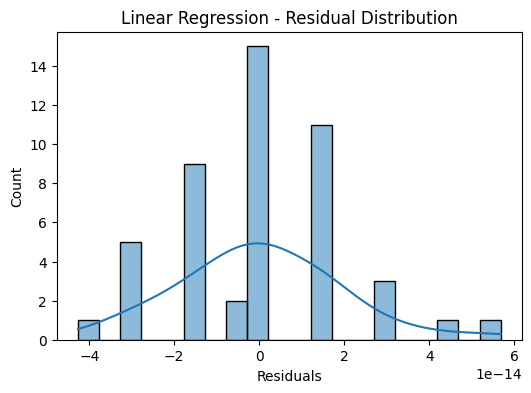


Decision Tree Performance:
RMSE: 4.7823
R² Score: 0.6623


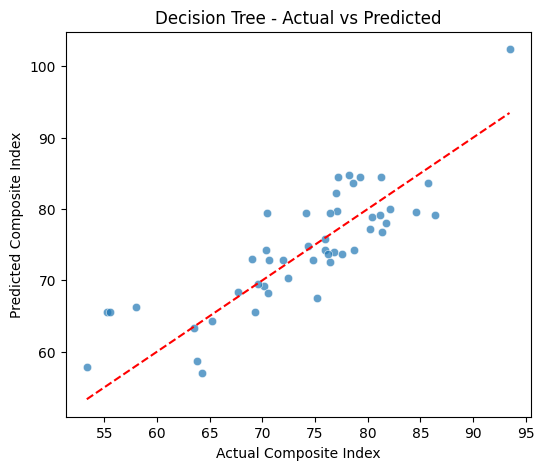

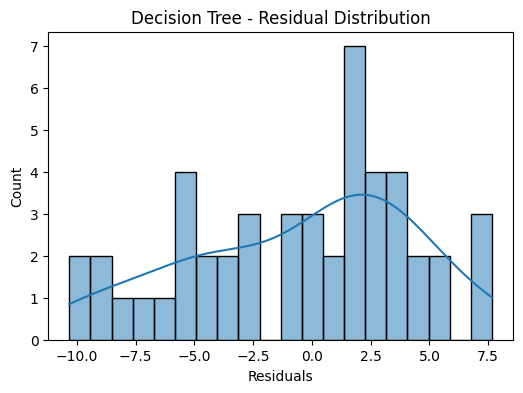


Random Forest Performance:
RMSE: 3.1621
R² Score: 0.8524


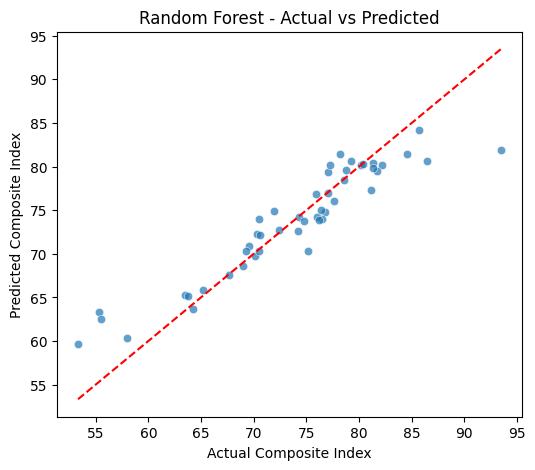

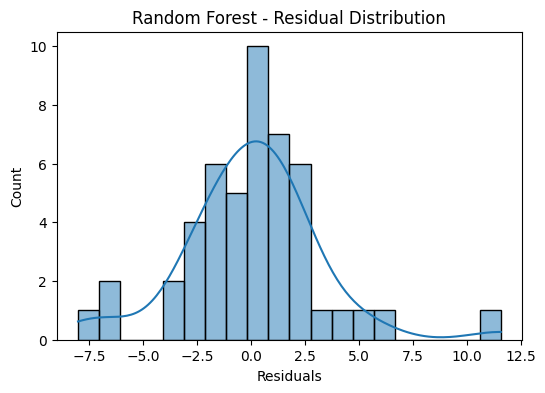


XGBoost Performance:
RMSE: 3.2090
R² Score: 0.8480


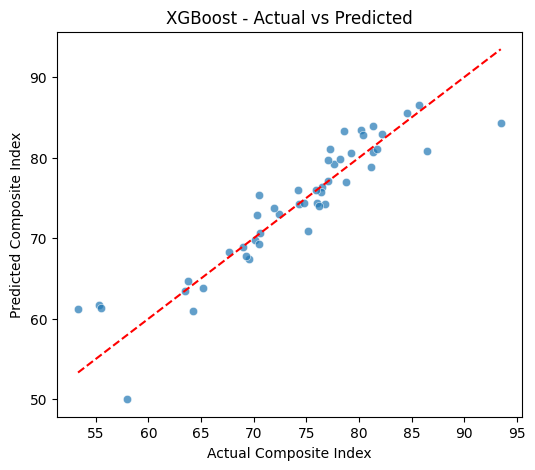

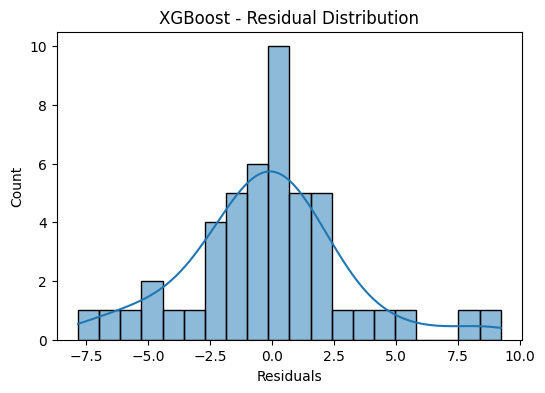

In [10]:
# Linear Regression
lin_model, lin_rmse, lin_r2 = evaluate_model("Linear Regression", LinearRegression(), X_train, y_train, X_test, y_test)

# Decision Tree
tree_model, tree_rmse, tree_r2 = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, y_train, X_test, y_test)

# Random Forest
rf_model, rf_rmse, rf_r2 = evaluate_model("Random Forest", RandomForestRegressor(random_state=42, n_estimators=100), X_train, y_train, X_test, y_test)

# XGBoost
xgb_model, xgb_rmse, xgb_r2 = evaluate_model("XGBoost", XGBRegressor(random_state=42, n_estimators=100), X_train, y_train, X_test, y_test)


In [11]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "RMSE": [lin_rmse, tree_rmse, rf_rmse, xgb_rmse],
    "R2_Score": [lin_r2, tree_r2, rf_r2, xgb_r2]
})

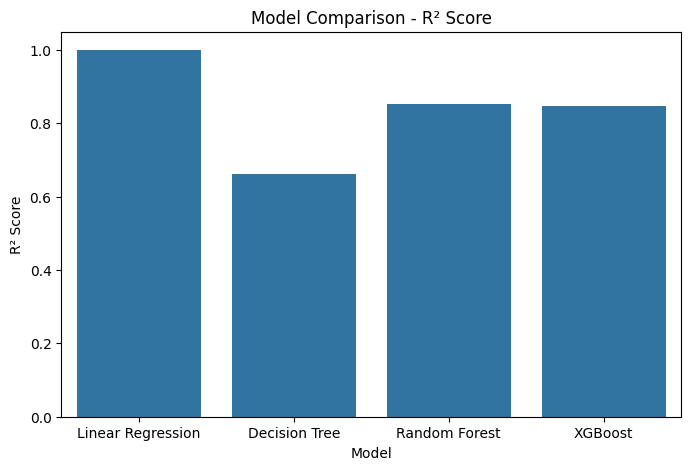

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2_Score", data=results)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.show()

In [13]:
print("\nFinal Model Comparison:")
print(results)


Final Model Comparison:
               Model          RMSE  R2_Score
0  Linear Regression  1.907689e-14  1.000000
1      Decision Tree  4.782312e+00  0.662333
2      Random Forest  3.162127e+00  0.852371
3            XGBoost  3.209020e+00  0.847960
